# Machine Learning - Decision Tree

## Install Sci-Kit Learn

In [1]:
### Install Sci-Kit Learn
!pip install scikit-learn

## Import Libraries

In [40]:
## Begin Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
## End Imports

## Pokemon Dataset

<center><img src="../images/web/pokemon.webp"></center>

### Load Dataset

In [3]:
### Load Pokemon CSV
file = "../data/pokemon.csv"

pokemon = pd.read_csv(file, index_col=0)

### View Info

In [4]:
### View Info
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


### Cleaning Data

In [5]:
## Fill Null Values with "None"
pokemon = pokemon.fillna("None")

pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


### Preview First Few Rows

In [6]:
### Preview First Few Rows
pokemon.head(15)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


### Visualize Distribution of Data

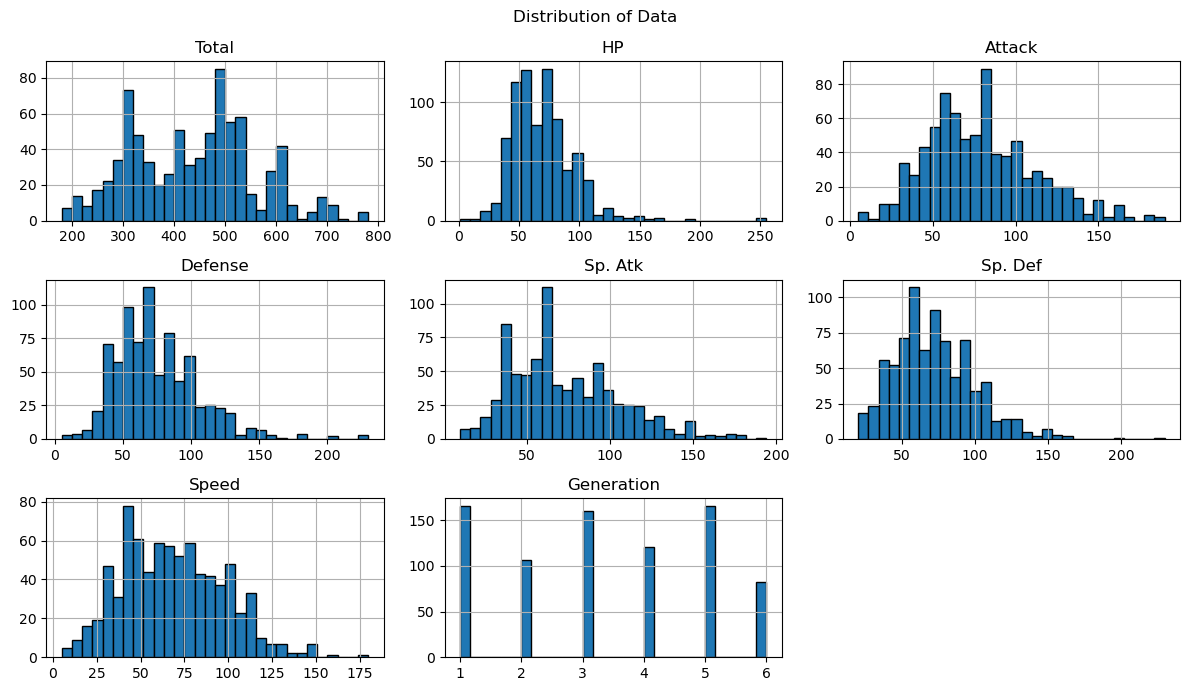

In [8]:
### Distribution of Data
pokemon.hist(figsize=(12,7),
             bins=30,
             edgecolor="black")

plt.subplots_adjust(hspace=0.7,
                    wspace=0.4)
plt.suptitle("Distribution of Data")
plt.tight_layout()

### Visualize Pokemon Type Count

#### Get Value Counts

__Syntax__:
```python
counts = dataframe[column_name].value_counts()
```

In [9]:
### Output Unique Types
pokemon_type_count = pokemon["Type 1"].value_counts()

pokemon_type_count

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

#### Visualize Types as Bar Plot

__Syntax__:
```python
sns.barplot(x=x_value, y=y_value)
```

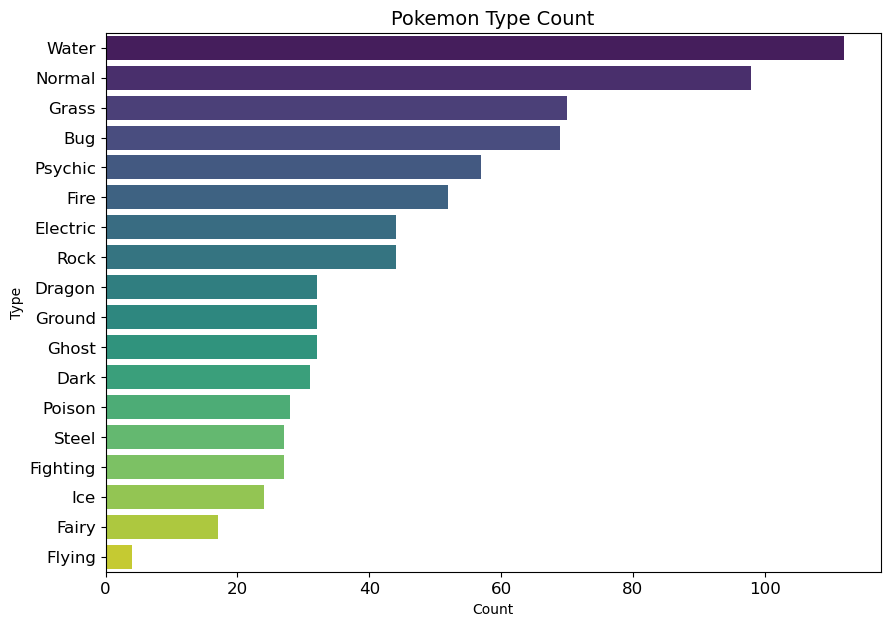

In [12]:
# Bar Plot
plt.figure(figsize=(10,7))

sns.barplot(x=pokemon_type_count.values, 
            y=pokemon_type_count.index, 
            palette='viridis', 
            hue=pokemon_type_count.index)

plt.title("Pokemon Type Count", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Type")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Prepare the Data

#### Define Features (`X`) and Target (`y`)

In [13]:
# Define Features and Target
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'Legendary', 'Generation']
target = 'Type 1'

X = pokemon[features]
y = pokemon[target]

### Split up the Data

In [14]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,  
                                                    random_state=42)

### View X Info

In [41]:
### X Info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 245 to 94
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HP          640 non-null    int64
 1   Attack      640 non-null    int64
 2   Defense     640 non-null    int64
 3   Sp. Atk     640 non-null    int64
 4   Sp. Def     640 non-null    int64
 5   Speed       640 non-null    int64
 6   Total       640 non-null    int64
 7   Legendary   640 non-null    bool 
 8   Generation  640 non-null    int64
dtypes: bool(1), int64(8)
memory usage: 45.6 KB


### View y Info

In [42]:
### y Info
y_test.info()

<class 'pandas.core.series.Series'>
Index: 160 entries, 635 to 609
Series name: Is_Electric
Non-Null Count  Dtype
--------------  -----
160 non-null    bool 
dtypes: bool(1)
memory usage: 1.4 KB


### Build Model - Decision Tree

Importing Decision Tree Classifier

```python
from sklearn.tree import DecisionTreeClassifier
```

### Build Model

In [18]:
## Import and Build Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

### Train Model

__Syntax__:
```python
model.fit(x_training_data, y_training_data)
```

In [19]:
## Train Model
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Get Predictions

__Syntax:__
```python
predictions = clf.predict(test_data)
```

In [20]:
## Get Predictions
predictions = clf.predict(X_test)

### View Predictions vs Actual Data

In [43]:
### Create DataFrame of Predictions
prediction_dictionary = {"Actual Type": y_test,
                         "Predicted Type": predictions}

results_df = pd.DataFrame(prediction_dictionary)

results_df.head(10)

,Actual Type,Predicted Type
#,,
635,False,False
606,False,False
58,False,False
479,True,True
61,False,False
560,False,False
317,False,False
442,False,False
690,False,False


### Evaluate Model

### Classification Report

Syntax:

```python
classification_report(Y_TEST, Y_PREDICTIONS)
```

In [39]:
### Classification Report Results
print(classification_report(y_test, 
                            predictions,      
                            zero_division = 0.0))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       150
        True       0.60      0.60      0.60        10

    accuracy                           0.95       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.95      0.95      0.95       160



### Improve the Data

Focus on predicting one Pokémon type.

In [29]:
## Improve the Data - Electric vs Non-Electric

pokemon['Is_Electric'] = pokemon['Type 1'] == 'Electric'

pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         800 non-null    object
 1   Type 1       800 non-null    object
 2   Type 2       800 non-null    object
 3   Total        800 non-null    int64 
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Atk      800 non-null    int64 
 8   Sp. Def      800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
 12  Is_Electric  800 non-null    bool  
dtypes: bool(2), int64(8), object(3)
memory usage: 76.6+ KB


### Inspect Data

In [30]:
pokemon["Is_Electric"].value_counts()

Is_Electric
False    756
True      44
Name: count, dtype: int64

### Set Up Features and Target

In [31]:
# Set Up Features and Target Again
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'Legendary', 'Generation']
target = 'Is_Electric'

X = pokemon[features]
y = pokemon[target]

### Set Up Training Data

In [32]:
# Set Up Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Set Up and Train Model

In [33]:
# Set Up Model
clf = DecisionTreeClassifier(random_state=42,
                            class_weight="balanced")

# Train Model
clf.fit(X_train, y_train)

# Get Predictions
predictions = clf.predict(X_test)

### Compare Actual Values vs Predicted Values

In [34]:
# Compare Predictions and Actual Values
predictions_dictionary = {"Actual Value": y_test,
                          "Predicted Value": predictions}

updated_prediction_df = pd.DataFrame(predictions_dictionary)

updated_prediction_df.head(10)

,Actual Value,Predicted Value
#,,
635,False,False
606,False,False
58,False,False
479,True,True
61,False,False
560,False,False
317,False,False
442,False,False
690,False,False


### Model Evaluation

In [36]:
### Classification Report Results
print(classification_report(y_test, 
                            predictions,
                            zero_division = 0.0))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       150
        True       0.60      0.60      0.60        10

    accuracy                           0.95       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.95      0.95      0.95       160

